In [1]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Load Mnist dataset
mnist = tf.keras.datasets.mnist
(images, labels), (_,_ ) = mnist.load_data()

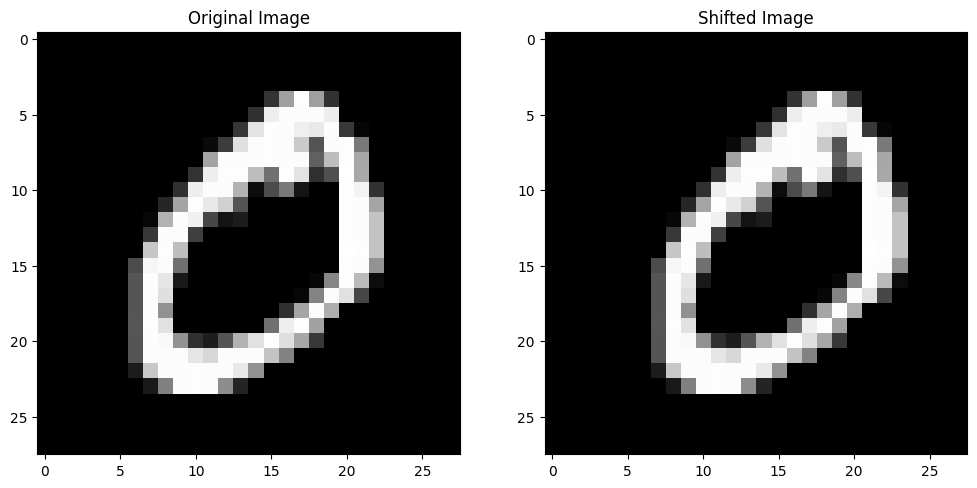

In [3]:
zero = images[labels == 0][0]
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(zero, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(zero_shifted, cmap='gray')
plt.title('Shifted Image')
plt.show()


In [7]:
eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T

In [17]:

print(eVal_shifted)

[1700.20141406 +0.j          858.25943961 +0.j
 -805.13510601+85.71139479j -805.13510601-85.71139479j
 -281.26703284+73.63888615j -281.26703284-73.63888615j
  290.04266031 +0.j          -41.03581266+80.93947425j
  -41.03581266-80.93947425j  102.50392926 +0.j
   87.9099773  +0.j          -56.89882661 +0.j
   -7.88109241+43.13295386j   -7.88109241-43.13295386j
   26.34792743 +0.j          -19.36421677 +7.30138931j
  -19.36421677 -7.30138931j]


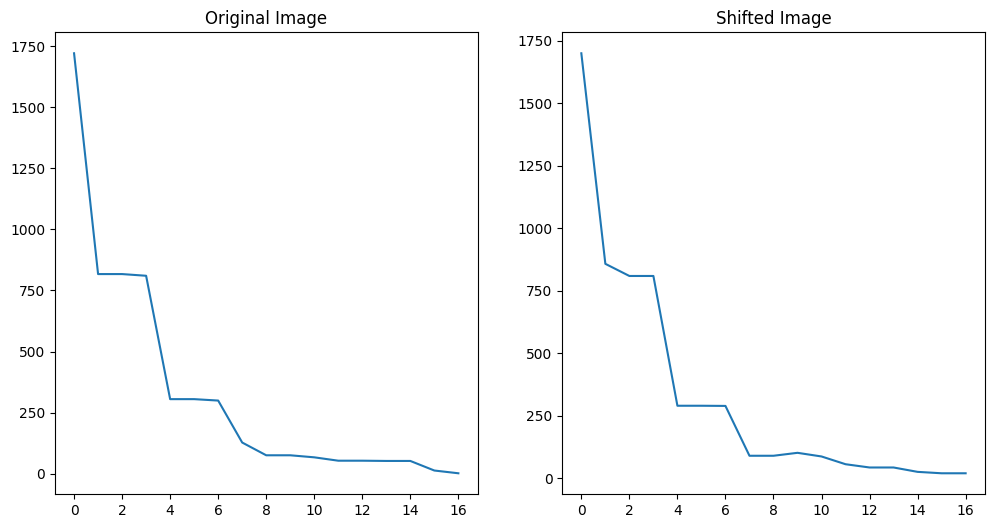

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Shifted Image')
plt.show()

In [22]:
angle = np.zeros((17, 17))

# Calculate angles and populate the angle matrix
for i in range(17):
    for j in range(17):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

print(angle)

[[0.9951305  0.7442316  0.90826039 0.90826039 0.75971419 0.75971419
  0.60010412 0.79800348 0.79800348 0.69364139 0.68884865 0.77975539
  0.66753961 0.66753961 0.56156427 0.48883143 0.48883143]
 [0.93769483 0.77332567 0.98762372 0.98762372 0.7756471  0.7756471
  0.6487913  0.85520369 0.85520369 0.77893821 0.75600706 0.83467544
  0.8047215  0.8047215  0.65357319 0.6432025  0.6432025 ]
 [0.93769483 0.77332567 0.98762372 0.98762372 0.7756471  0.7756471
  0.6487913  0.85520369 0.85520369 0.77893821 0.75600706 0.83467544
  0.8047215  0.8047215  0.65357319 0.6432025  0.6432025 ]
 [0.81990083 0.91480752 0.74218057 0.74218057 0.7984777  0.7984777
  0.80857717 0.83230495 0.83230495 0.80202522 0.81001594 0.82462179
  0.74275396 0.74275396 0.64099346 0.6625484  0.6625484 ]
 [0.81428903 0.81970642 0.80012658 0.80012658 0.83378148 0.83378148
  0.7837094  0.75178917 0.75178917 0.7493034  0.73441723 0.8306543
  0.70991108 0.70991108 0.63746847 0.63917899 0.63917899]
 [0.81428903 0.81970642 0.80012658

Text(0.5, 1.0, 'Original Image')

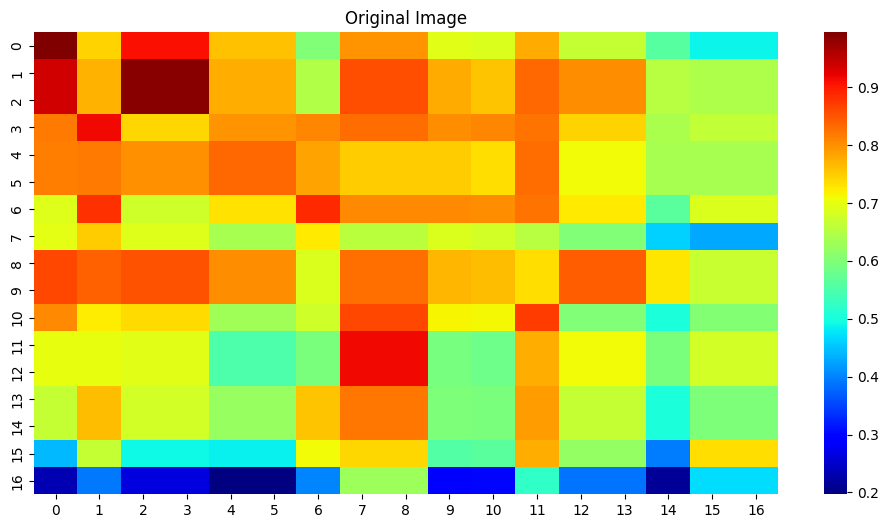

In [25]:

plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Original Image')
